##### <font color = 'green'> The Convolutional Neural Network model for the detection of rotten fruits

##### <font color = 'grey'> A mini_project to evaluate the robustness of a convolutional neural network model in building a detection and classification algorithms

##### <font color = 'grey'> Prepared by: Olanrewaju Adegoke - larrysman2004@yahoo.com - olanrewaju.adegoke@prognozai.com 

In [1]:
import os

In [2]:
data_path = '../data'
model_path = '../models'
ntbook_path = '../notebooks'
out_path = '../outputs'
res_path = '../resources'
vis_path = '../visuals'

In [3]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\fruit_detection_project\\notebooks'

In [4]:
os.chdir(res_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\fruit_detection_project\\resources'

##### Import self built module

In [5]:
import olanrewaju as ola

In [6]:
dir(ola)

['LabelEncoder',
 'LogisticRegression',
 'MinMaxScaler',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'RFE',
 'RandomForestClassifier',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'all_num_transform',
 'categorical_data',
 'change_dtype_function',
 'check_wrong_label',
 'concat_df',
 'convert_rfe_features_to_dataframe',
 'dataframe_describe',
 'dataframe_explore',
 'date_to_datetime_format',
 'datetime',
 'dropping_columns',
 'duplicate_corrector',
 'feature_selection_rfe',
 'feature_target_selector',
 'file_copy_v2',
 'file_image_saver_versioning_v1',
 'file_load_v4',
 'get_dummy_encoder',
 'joblib',
 'label_encoding',
 'merging_rfe_df',
 'min_max_scaler',
 'mislabel_function_corrector_v2',
 'missing_and_duplicate_checker',
 'missing_value_corrector_v2',
 'norm_scaler',
 'np',
 'numerical_data',
 'one_hot_encoding',
 'ordinal_encoding',
 'os',
 'outliers_correction

##### Import other libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

##### Access the images

In [8]:
os.chdir(data_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\fruit_detection_project\\data'

In [9]:
os.walk(data_path) # using os.walk() to access the folders

<generator object walk at 0x000001AAD859B290>

In [10]:
for d_name, folder, file_name in os.walk(data_path):
    print(d_name)
    #print(folder)
    #print(file_name)

../data
../data\logs
../data\logs\train
../data\logs\validation
../data\Test
../data\Test\0% Rotten
../data\Test\100% Rotten
../data\Test\25% Rotten
../data\Test\50% Rotten
../data\Test\75% Rotten
../data\Train
../data\Train\0% Rotten
../data\Train\100% Rotten
../data\Train\25% Rotten
../data\Train\50% Rotten
../data\Train\75% Rotten


In [11]:
def img_loader_to_list_wrt_fmt(data_path):
    '''
    This function is use to load an images with the '.jpg' and '.png' extensions into different lists according to the image format.
    It also create the labels based on the image labels and stored them in the same list with the image with different format.
    Input:
        data_path: This is the path to the image dataset that contains different image format.
    Outputs:
        This function returns four different lists as outputs.
        Train_jpg: This is the list that contains the images with the '.jpg' extension as a training data.
        Train_png: This is the list that contains the images with the '.png' extension as a training data.
        Test_jpg: This is the list that contains the images with the '.jpg' extension as a testing data.
        Test_png: This is the list that contains the images with the '.png' extension as a testing data.

    Please note: This function is build specifically to perform the task described and can be modify to do other similar function.
    Constructed by: Olanrewaju Adegoke - larrysman2004@yahoo.com - +2348028043078 - +33745659524
    '''
    Train_jpg = []
    Train_png = []
    Test_jpg = []
    Test_png = []
    for dir_name, file, filenames in os.walk(data_path):
        if len(filenames) > 0 and len(dir_name) > 0: # not empty
            if 'Train' in dir_name and '0% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Train_jpg.append([dir_name, img, '0% Rotten'])
                    elif '.png' in img:
                        Train_png.append([dir_name, img, '0% Rotten'])
    
            elif 'Train' in dir_name and '25% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Train_jpg.append([dir_name, img, '25% Rotten'])
                    elif '.png' in img:
                        Train_png.append([dir_name, img, '25% Rotten'])
    
            elif 'Train' in dir_name and '50% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Train_jpg.append([dir_name, img, '50% Rotten'])
                    elif '.png' in img:
                        Train_png.append([dir_name, img, '50% Rotten'])
    
            elif 'Train' in dir_name and '75% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Train_jpg.append([dir_name, img, '75% Rotten'])
                    elif '.png' in img:
                        Train_png.append([dir_name, img, '75% Rotten'])
    
            elif 'Train' in dir_name and '100% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Train_jpg.append([dir_name, img, '100% Rotten'])
                    elif '.png' in img:
                        Train_png.append([dir_name, img, '100% Rotten'])
    
            elif 'Test' in dir_name and '0% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Test_jpg.append([dir_name, img, '0% Rotten'])
                    elif '.png' in img:
                        Test_png.append([dir_name, img, '0% Rotten'])
    
            elif 'Test' in dir_name and '25% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Test_jpg.append([dir_name, img, '25% Rotten'])
                    elif '.png' in img:
                        Test_png.append([dir_name, img, '25% Rotten'])
    
            elif 'Test' in dir_name and '50% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Test_jpg.append([dir_name, img, '50% Rotten'])
                    elif '.png' in img:
                        Test_png.append([dir_name, img, '50% Rotten'])
    
            elif 'Test' in dir_name and '75% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Test_jpg.append([dir_name, img, '75% Rotten'])
                    elif '.png' in img:
                        Test_png.append([dir_name, img, '75% Rotten'])
    
            elif 'Test' in dir_name and '100% Rotten' in dir_name:
                for img in filenames:
                    if '.jpg' in img:
                        Test_jpg.append([dir_name, img, '100% Rotten'])
                    elif '.png' in img:
                        Test_png.append([dir_name, img, '100% Rotten'])

    return Train_jpg,Train_png,Test_jpg,Test_png

#### Extracting the images into a list according to the image format

In [12]:
data_path = data_path
Train_jpg,Train_png,Test_jpg,Test_png = img_loader_to_list_wrt_fmt(data_path)

In [13]:
Train_jpg[0]

['../data\\Train\\0% Rotten', 'apple_06.jpg', '0% Rotten']

In [14]:
Train_png[0]

['../data\\Train\\0% Rotten',
 'translation_Screen Shot 2018-06-08 at 5.33.05 PM.png',
 '0% Rotten']

In [15]:
Test_jpg[0]

['../data\\Test\\0% Rotten', 'apple_102.jpg', '0% Rotten']

In [16]:
Test_png[0]

['../data\\Test\\100% Rotten',
 'rotated_by_15_Screen Shot 2018-06-08 at 2.33.04 PM.png',
 '0% Rotten']

In [17]:
def imgfmt_conv_jpg_png(img_list):
    '''
    This function is use to convert the images in '.jpg' format into '.png' format.
    It takes the image list with the format '.jpg' and convert it to '.png'.
    Since, '.png' is lossless, no significant loss in the image quality. Also, '.jpg' is lossy hence the reverse may result to loss of image quality.
    Input:
        img_list: This is the list that contains the path to the image, the image_name and the labels.
    Output:
        image_converted: This is the list of the converted images with the image path, converted image_name in '.png' and the labels.

    Please note: This function is build specifically to perform the task described and can be modify to do other similar function.
    Constructed by: Olanrewaju Adegoke - larrysman2004@yahoo.com - +2348028043078 - +33745659524
    '''
    image_converted = []
    for path, image, label in img_list:
        img = os.path.join(image)
        img_split, ext = os.path.splitext(img)
        output_to_png = os.path.join(f"{img_split}.png")
        image_converted.append([path, output_to_png, label])
    print('The image in jpg is converted to png and stored as a list with path, image_name and labels.')    
    return image_converted

In [18]:
img_list = Train_jpg
train_jpg_converted = imgfmt_conv_jpg_png(img_list)

The image in jpg is converted to png and stored as a list with path, image_name and labels.


In [19]:
img_list = Test_jpg
test_jpg_converted = imgfmt_conv_jpg_png(img_list)

The image in jpg is converted to png and stored as a list with path, image_name and labels.


##### <font color = 'green'> Concatenate all the lists together for Training and Testing data

In [20]:
train_list = train_jpg_converted + Train_png
train_list[0]

['../data\\Train\\0% Rotten', 'apple_06.png', '0% Rotten']

In [21]:
len(train_list)

650

In [22]:
test_list = test_jpg_converted + Test_png
test_list[0]

['../data\\Test\\0% Rotten', 'apple_102.png', '0% Rotten']

In [23]:
len(test_list)

150

##### <font color = 'green'> Preprocess the training data

In [24]:
train_list[0][0] + '/' + train_list[0][1]

'../data\\Train\\0% Rotten/apple_06.png'

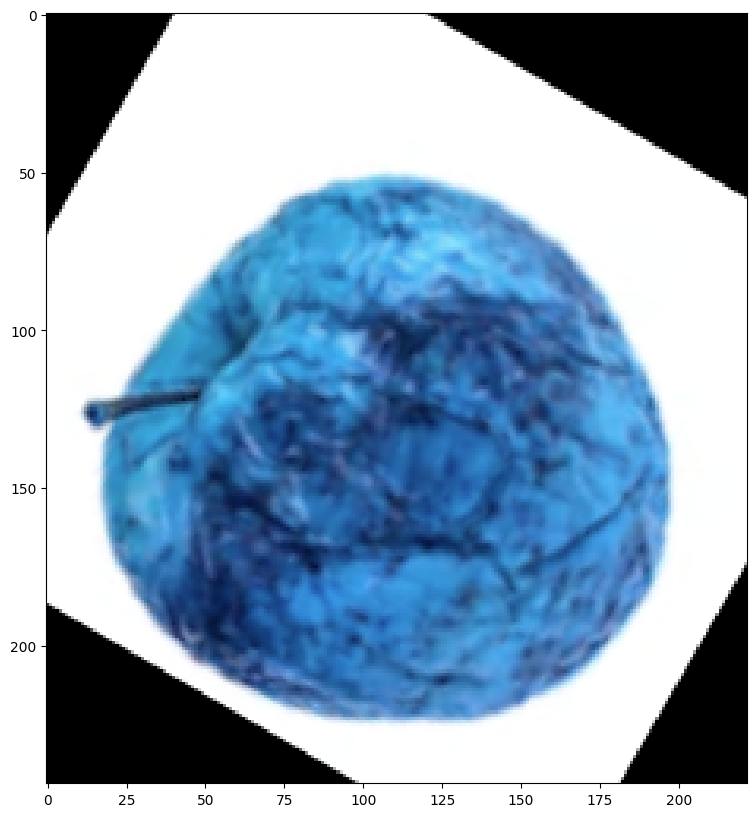

In [25]:
img1 = cv2.imread(train_list[200][0] + '/' + train_list[200][1])
plt.figure(figsize=(10, 10))
plt.imshow(img1)

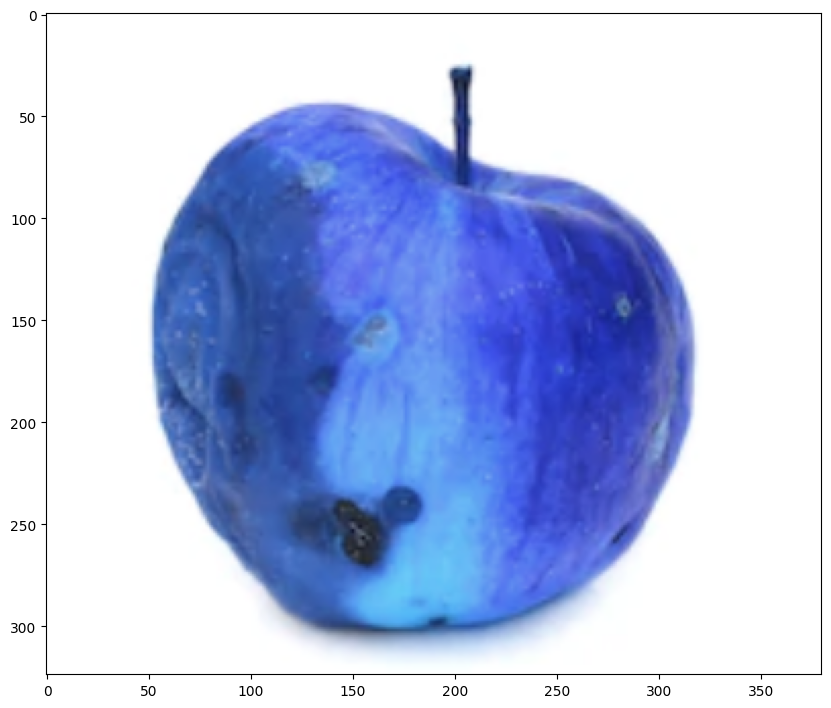

In [26]:
img2 = cv2.imread(train_list[500][0] + '/' + train_list[500][1])
plt.figure(figsize=(10, 10))
plt.imshow(img2)

##### <font color = 'green'> Resize and Select the labels

In [27]:
def resize_image_cnn(data_list,size):
    '''
    This function resize images and extract the image and its corresponding label in the data_list.
    Inputs:
        data_list: This is the data list of images we have extracted and classified as training, test or validation.
        size: This is the size of the image or dimension we want the image to be resized to. It must be a tuple e.g (150, 150).

    Outputs:
        This function returns three outputs.
        1.features: This is an array of all resized images without the labels. It serves as the feautres of the dataset.
        2.labels: This is the list of all labels in the given dataset/image.
        3.feat_label: This is a list that contains the resized array and the labels.

    Please note: To use this function, you will need to have properly extract and load your images into there respective list as train, test or validation.
    '''
    feat_label = []
    features = []
    labels = []
    for path, image, label in data_list:
        img = cv2.imread(os.path.join(path, image))
        if img is None:
            continue
        img = cv2.resize(img, size)
        features.append(img)
        labels.append(label)
        feat_label.append([img, label])
    return np.array(features), labels, feat_label

In [28]:
data_list = train_list
size = (224, 224)
train_features, train_labels, _ = resize_image_cnn(data_list,size)

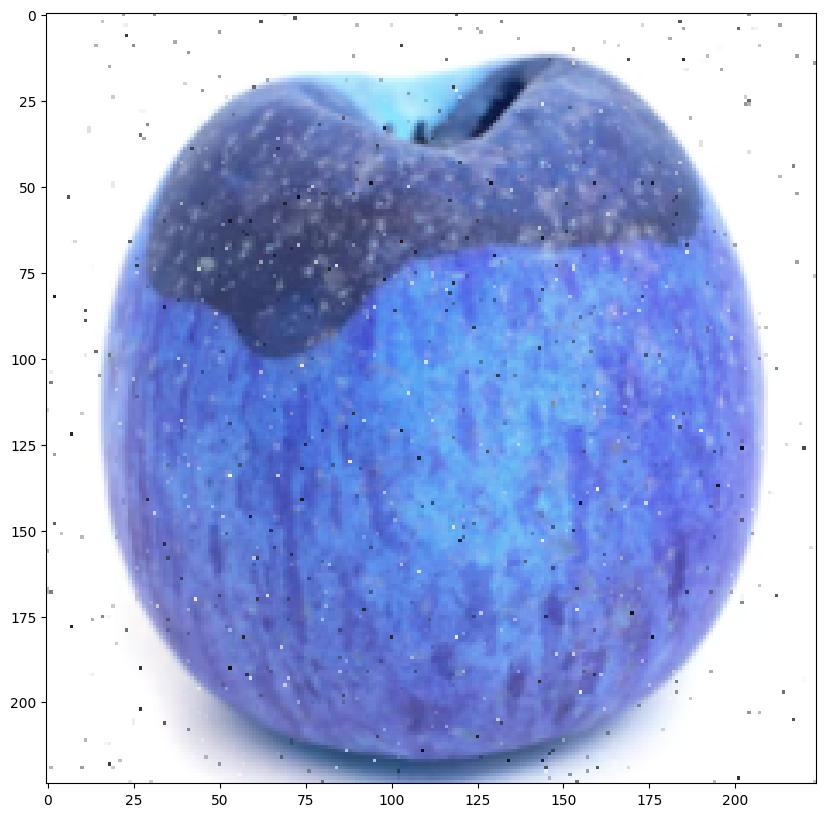

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(train_features[200])

##### <font color = 'green'> Normalize the Training data

In [30]:
def normalized_cnn(reshaped_image):
    '''
    This function is used to normalize an numpy.ndarray images such that the values lies between [0, 1].
    Input:
        reshaped_image: This is an array of images that is already reshaped by the defined dimension or size.
    Output:
        norm_img: This is a normalized numpy.ndarray of the images with values between 0 and 1 both inclusive.
        It is the resultant array to be used for the deep learning model training.
    '''
    norm_img = reshaped_image.astype('float32') / 255.0  
    return norm_img

In [31]:
reshaped_image = train_features
train_norm = normalized_cnn(reshaped_image)

##### <font color = 'green'> Encode the training labels

In [32]:
def label_encoding_cnn(labels, encoder):
    '''
    This function convert a categorical labels in of an image into numerical encoding by using label encoder and one-hot encoder.
    To use the function, you would need to import tensorflow libraries and labelencoder:
        from sklern.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
    Inputs:
        labels: This is the list of all the labels as obtain from the dataset or created.
        encoder: This is the instantiation of the choice of encoder to use. Here,
                  we recommend using the Label encoding which will first encode the strings into numerical.

    Output:
        encoded_label: This is the encoded binary array of the original labels that will be used for the deep learning model.
    '''
    label_encoder = encoder
    label_encoder.fit(labels)
    encoded_label = label_encoder.transform(labels)
    label_class = label_encoder.classes_
    encoded_label = to_categorical(encoded_label, num_classes=len(label_class))
    return encoded_label,label_class

In [33]:
labels = train_labels
encoder = LabelEncoder()
encoded_train_label, label_class = label_encoding_cnn(labels, encoder)

##### <font color = 'green'> Selecting the Validation data from the training data preprocessed using StratifiedShuffleSplit(SSS)

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

# Both features and labels must be an array
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, val_index in sss.split(train_norm, encoded_train_label):
    X_train, X_val = train_norm[train_index], train_norm[val_index]
    y_train, y_val = encoded_train_label[train_index], encoded_train_label[val_index]

In [35]:
label_class

array(['0% Rotten', '25% Rotten', '75% Rotten'], dtype='<U10')

##### <font color = 'green'> Preprocess the Test data

In [36]:
len(test_list)

150

##### <font color = 'green'> Resize the Test data

In [37]:
data_list = test_list
size = (224, 224)
test_features, test_labels, _ = resize_image_cnn(data_list,size)

##### <font color = 'green'> Normalize the test image

In [38]:
reshaped_image = test_features
test_norm = normalized_cnn(reshaped_image)

##### <font color = 'green'> Encode the labels of the test data

In [39]:
labels = test_labels
encoder = LabelEncoder()
encoded_test_label, test_label_class = label_encoding_cnn(labels, encoder)

In [40]:
test_label_class

array(['0% Rotten', '25% Rotten', '75% Rotten'], dtype='<U10')

###### <font color = 'green'> Checking the shape of the preprocessed images

In [41]:
print(f"Train features shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test features shape: {test_norm.shape}")
print(f"Test labels shape: {encoded_test_label.shape}")

Train features shape: (468, 224, 224, 3)
Train labels shape: (468, 3)
Validation features shape: (52, 224, 224, 3)
Validation labels shape: (52, 3)
Test features shape: (120, 224, 224, 3)
Test labels shape: (120, 3)


#### <font color = 'green'> Building the Convolutional Neural Network Model

In [42]:
target_size = 224

In [43]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(target_size, target_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


##### <font color = 'green'> Compile the model

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### <font color = 'green'> Model Summary

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       5,538,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,675,235 (21.65 MB)

 Trainable params: 5,675,235 (21.65 MB)

 Non-trainable params: 0 (0.00 B)

##### <font color = 'green'> Train the model

In [46]:
BATCH_SIZE = 16
EPOCHS = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=3) 
tensorboard = TensorBoard(log_dir='./logs') 

hist = model.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val,y_val), verbose=1,  callbacks=[early_stopping, tensorboard])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4240 - loss: 1.0958 - val_accuracy: 0.5000 - val_loss: 1.0644
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5486 - loss: 1.0355 - val_accuracy: 0.5000 - val_loss: 1.0620
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5131 - loss: 1.0383 - val_accuracy: 0.5000 - val_loss: 1.0813
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5193 - loss: 1.0283 - val_accuracy: 0.5192 - val_loss: 1.1776
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5190 - loss: 0.9902 - val_accuracy: 0.5000 - val_loss: 1.1091


##### <font color = 'green'> Evaluate the model

In [47]:
loss, accuracy = model.evaluate(test_norm, encoded_test_label)
print('Test accuracy:', accuracy)
print(' ')
print('Test loss:', loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 653ms/step - accuracy: 0.6306 - loss: 0.9169
Test accuracy: 0.5166666507720947
 
Test loss: 0.9808992147445679


##### <font color = 'green'> Predicting the Class

In [48]:
test_norm[0][0][0]

array([0., 0., 0.], dtype=float32)

In [49]:
encoded_test_label[0]

array([1., 0., 0.])

In [50]:
predicted_labels = model.predict(test_norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 685ms/step


In [51]:
predicted_classes = np.argmax(predicted_labels, axis=1)
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [52]:
pred_class = predicted_classes[119]
class_names = ['0% Rotten', '25% Rotten', '75% Rotten']
print('The predicted rotten fruit label is:', class_names[pred_class])

The predicted rotten fruit label is: 0% Rotten


##### <font color = 'green'> Confusion Matrix

Confusion Matrix: 

[[51  7  2]
 [20 10  0]
 [27  2  1]]


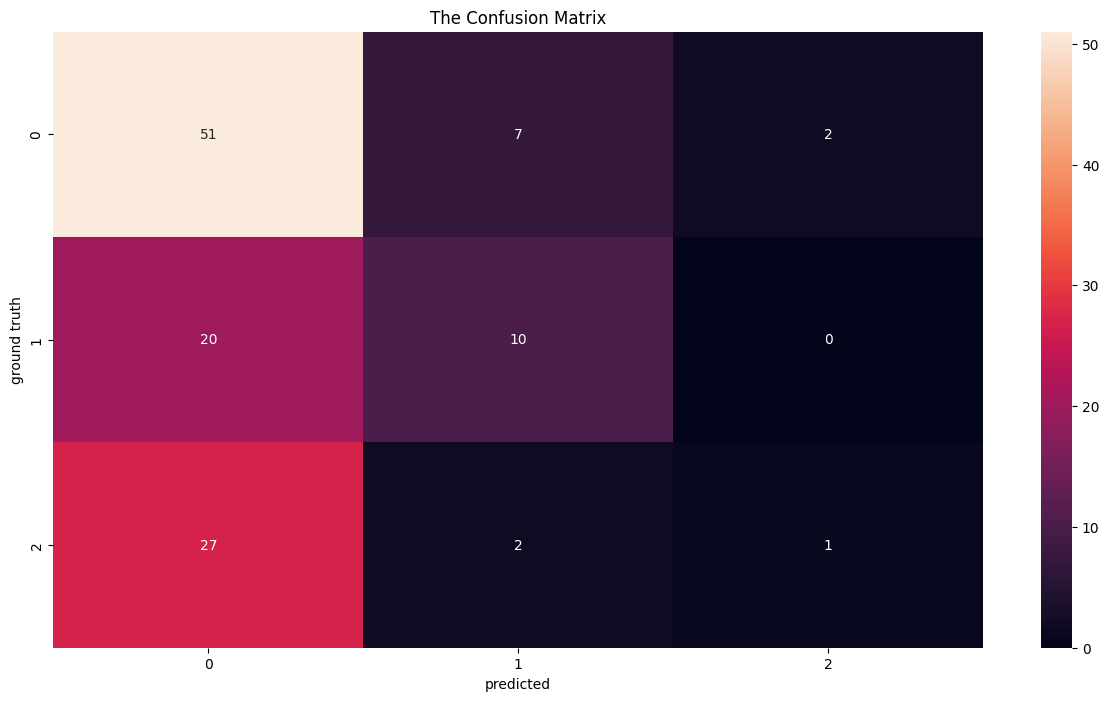

In [53]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(encoded_test_label.argmax(axis=1), predicted_classes)

# Print confusion matrix
print("Confusion Matrix: \n")
print(conf_mat)

# Displaying the Confusion Matrix
plt.figure(figsize=(15,8))
sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The Confusion Matrix')
plt.show()